In [0]:
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=top_words,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=420,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

print(len(y_train), len(y_test))

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step
25000 25000


In [0]:
word_id = imdb.get_word_index()
word_id = {k:(v+3) for k,v in word_id.items()}
word_id["PADDING"] = 0
word_id["BEGIN"] = 1
word_id["UNKNOWN"] = 2
word_id["UNUSED"] = 3

id_word = {value:key for key,value in word_id.items()}
reviews = []
test_r = []
for x in x_train:
  reviews.append(' '.join(id_word[id] for id in x))
for x in x_test:
  test_r.append(' '.join(id_word[id] for id in x))

x_test[66]

1646592/1641221 [==============================] - 0s 0us/step


[1,
 1713,
 28,
 13,
 110,
 35,
 206,
 836,
 20,
 15,
 16,
 38,
 357,
 600,
 7,
 4,
 206,
 139,
 26,
 1127,
 4,
 65,
 347,
 9,
 164,
 318,
 5,
 549,
 18,
 6,
 378,
 7,
 156,
 4,
 116,
 9,
 78,
 1441,
 7283,
 9311,
 678,
 2756,
 381,
 17,
 4,
 428,
 313,
 2297,
 7,
 4005,
 37,
 214,
 309,
 11,
 4,
 655,
 7,
 6,
 3573,
 15,
 494,
 90,
 5,
 53,
 84,
 351,
 2597,
 3294,
 6,
 58,
 8,
 516,
 2917,
 299,
 6,
 464,
 37,
 29,
 716,
 285,
 29,
 70,
 5,
 4220,
 4367,
 4220,
 4367,
 6369,
 2,
 5113,
 299,
 6,
 2422,
 37,
 214,
 574,
 11,
 4,
 904,
 1441,
 7283,
 9,
 608,
 17,
 4,
 323,
 2597,
 3294,
 9,
 6,
 52,
 284,
 37,
 408,
 6,
 52,
 239,
 4220,
 4367,
 408,
 6,
 338,
 239,
 19,
 6,
 78,
 20,
 13,
 70,
 165,
 40,
 12,
 48,
 12,
 47,
 6,
 52,
 277,
 21,
 14,
 20,
 47,
 6,
 55,
 954,
 277,
 19,
 49,
 220,
 1322,
 538]

##Method 1:

In [0]:
import pandas as pd
import numpy as np
import re
import time
def cleanup(review):
  ignore = ['PADDING', 'BEGIN', 'UNKNOWN', 'UNUSED','i','me','my','myself','we','our','ours','ourselves','you',"you're",
   "you've","you'll",'your','he','him','his','himself','she','her',
   'hers','herself','it',"it's",'its','itself','they','them','their','theirs',
   'what','which','who','this','that',"that'll",'these','those','am',
   'is','are','was','were','be','been','being','have','has','had','having',
   'do','does','did','doing','a','an','the','and','but','if','or','because',
   'as','until','while','of','at','by','for','with','about','against',
   'during','before','after','to','from','again','here','there', 'on',
   'when','where','why','how','all','any','no','only','own','same','too',
   'very','can','will','just','now',"didn't","haven't","isn't","wasn't",'·','', '>']
  
  words = re.sub("[^\w]", " ",  review).split()
  # cleaned = []
  # for word in words:
  #   if word.lower() not in ignore:
  #     cleaned.append(word.lower())
      
  cleaned = [w.lower() for w in words if w.lower() not in ignore and w not in ignore]
  return cleaned

['well', 've', 'read', 'book', 'first', 'thought', 'wow', 'would', 'cool', 'see', 'in', 'movie', 'than', 'started', 'searching', 'found', 'already', 'movie', 'made', 'bought', 'movie', 'week', 'ago', 'dvd', 'watched', 'awfully', 'wrong', 'first', 'kid', 'isn', 't', 'character', 'in', 'book', 'then', 'mix', 'between', 'two', 'books', 'river', 'seventh', 'than', 'nicolas', 'needing', 'in', 'book', 'actually', 'whole', 'thing', 'wrong', 'also', 'supposed', 'invented', 'lightweight', 'whole', 'thing', 'tomb', 'also', 'wrong', 'supposed', 'channel', 'some', 'kind', 'around', 'tomb', 'made', 'in', 'possibility', 'pass', 'one', 'knows', 'rules', 'ancient', 'game', 'nothing', 'in', 'movie', 'nicolas', 'english', 'christian', 'in', 'book', 'not', 'muslim', 'list', 'endless', 'few', 'things', 'good', 'movie', 'actors', 'played', 'boris', 'mick', 'well', 'chosen', 'rest', 'parodies', 'characters', 'in', 'book', 'worst', 'didn', 't', 'get', 'even', 'close', 'character', 'in', 'head', 'wrote', 'boo

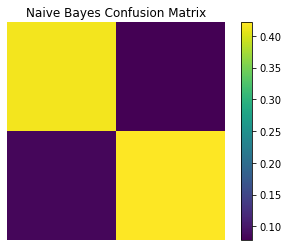

In [0]:
start = time.time()
constant = np.log(np.sum(np.where(np.array(y_train)==0))/np.sum(np.where(np.array(y_train)==1)))

pofx = {}
print(cleanup(test_r[20]))
for(ix, review) in enumerate(reviews):
  words = cleanup(review)
  for word in words:
    if word not in pofx:
      counts = [0, 0]
      counts[y_train[ix]] = 1
      pofx[word] = counts
    else:
      pofx[word][y_train[ix]] += 1

#play with the .000001
pofx = {i:[pofx[i][0]/np.sum(pofx[i])+ 0.0000001 , pofx[i][1]/np.sum(pofx[i])+ 0.0000001 ]for i in pofx}

tables = [[i, np.log(pofx[i][0]/pofx[i][1])] for i in pofx]

tabs = {i[0]:i[1] for i in tables}

# Evaluation
correct = 0
correct2 = 0
t1 = 0
t2 = 0

for (ix, review) in enumerate(test_r):
  words = cleanup(review)
  ratio = constant
  for word in words:
    if word in tabs:
      ratio += tabs[word]
  if(ratio<0):
    guess = 1
  else:
    guess = 0
  if(guess==y_test[ix] and guess == 1):
    correct += 1
  elif(guess==y_test[ix] and guess == 0):
    correct2 += 1
  else:
    if(guess==1 and y_test[ix]==0):
      t1+=1
    else:
      t2+=1
print("Time taken: ", time.time() - start)      
print("Correct classification (percentage):", (correct + correct2)/np.size(y_test))
print("Type 1:", t1/np.size(y_test))
print("Type 2:", t2/np.size(y_test))

confusion = np.zeros((2, 2))
confusion[0, 0] = correct/np.size(y_test)
confusion[1, 1] = correct2/np.size(y_test)
confusion[1, 0] = t2/np.size(y_test)
confusion[0, 1] = t1/np.size(y_test)

import matplotlib.pyplot as plt

plt.imshow(confusion)
plt.colorbar()
plt.axis('off')
plt.title('Naive Bayes Confusion Matrix')
plt.savefig('bayesConfMat.png')

##Method 2:







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5000, 32)          320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 160000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               40000250  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 40,320,501
Trainable params: 40,320,501
Non-trainable params: 0
_________________________________________________________________



Train on 25000 samples, validate on 25000 samples
Epoch 1/2





 - 22s - loss: 0.6388 - acc: 0.7307 - val_loss: 0.2953 - val_acc: 0.8766


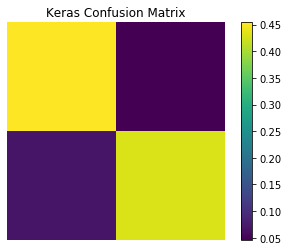

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
start = time.time()
max_words = 5000
X_train = sequence.pad_sequences(x_train, maxlen=max_words)
X_test = sequence.pad_sequences(x_test, maxlen=max_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Time take: ", time.time() - start)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

# get confusion matrix
cm = confusion_matrix(y_test, y_pred.round()) / y_test.size

import matplotlib.pyplot as plt

plt.imshow(cm);
plt.colorbar()
plt.axis('off')
plt.title('Keras Confusion Matrix')
plt.savefig('kerasConfMat.png')